In [11]:
from core.common import DATA_FOLDER, SAMPLE_CHANNELS, SAMPLE_WIDTH, SAMPLE_RATE
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import ipywidgets as widgets
from IPython.display import display
from pydub import AudioSegment
import simpleaudio as sa


In [12]:
video_file_path = "/home/kevin/Documents/voice-activity-detection/data/my_audio_files/videoAudio/T40S1M_videoaudio.wav"
mic_file_path = "/home/kevin/Documents/voice-activity-detection/data/my_audio_files/processedMicAudio/T40S1M_processedMicAudio.wav"

assert os.path.exists(video_file_path)
assert os.path.exists(mic_file_path)

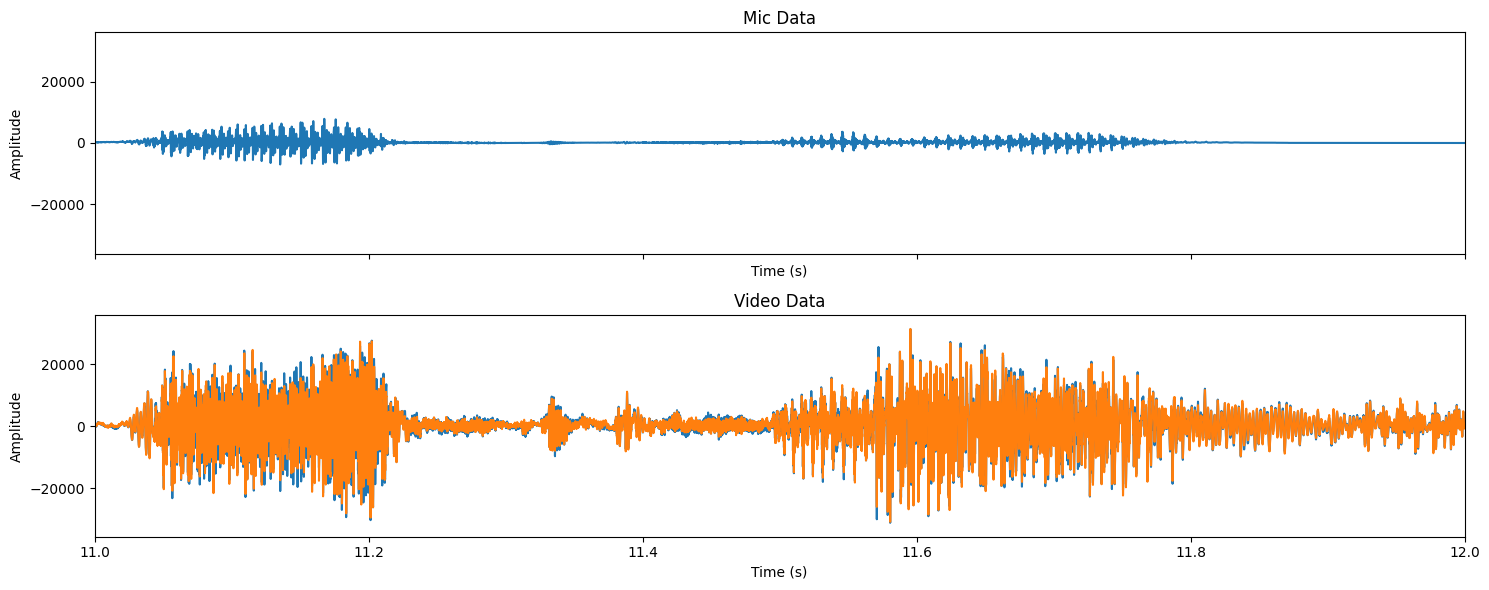

In [13]:
# Read the mic data
mic_sample_rate, mic_data = wavfile.read(mic_file_path)

# Read the video data
video_sample_rate, video_data = wavfile.read(video_file_path)

# Create time arrays for x-axis
mic_time = np.linspace(0, len(mic_data) / mic_sample_rate, num=len(mic_data))
video_time = np.linspace(0, len(video_data) / video_sample_rate, num=len(video_data))

# Plot both data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6), sharex=True)

x_window = [11, 12]

ax1.plot(mic_time, mic_data)
ax1.set_xlim(x_window)
ax1.set_title('Mic Data')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2.plot(video_time, video_data)
ax2.set_xlim(x_window)
ax2.set_title('Video Data')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [14]:
# Load the audio file and set the desired parameters
audio_segment = (AudioSegment.from_file(video_file_path)
                 .set_frame_rate(SAMPLE_RATE)
                 .set_sample_width(SAMPLE_WIDTH)
                 .set_channels(SAMPLE_CHANNELS))


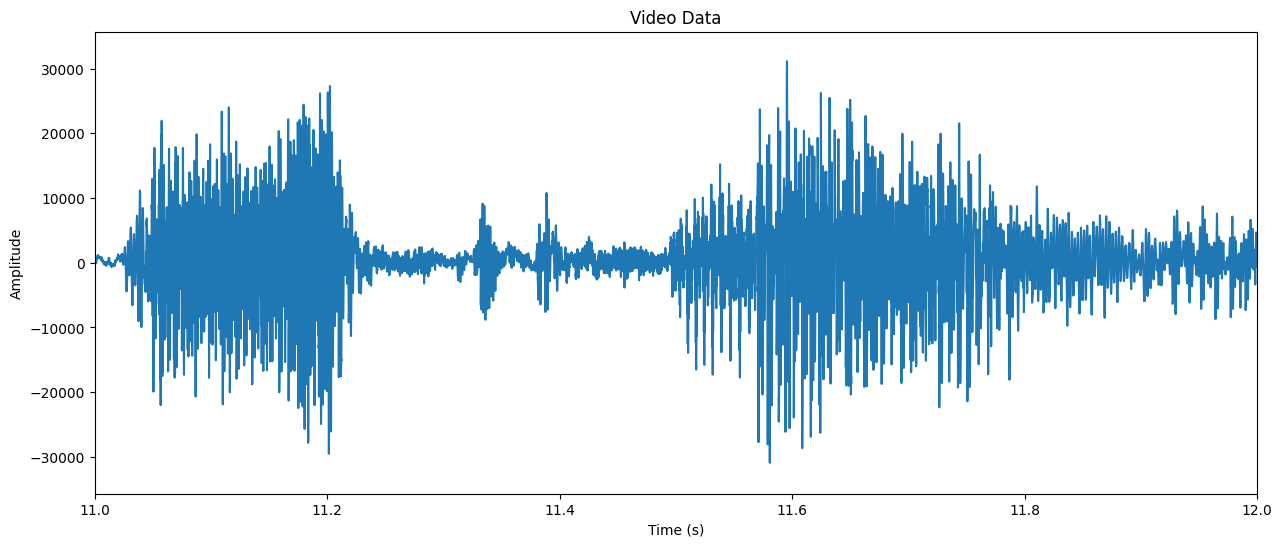

In [15]:
# Extract raw data from the audio segment
audio_data = np.array(audio_segment.get_array_of_samples())

# Create time array for x-axis
audio_time = np.linspace(0, len(audio_data) / SAMPLE_RATE, num=len(audio_data))

# Plot the audio data
plt.figure(figsize=(15, 6))
plt.plot(audio_time, audio_data)
plt.xlim(x_window)
plt.title('Video Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# Load the audio file
audio_segment = AudioSegment.from_file(video_file_path)

# Define start and end time (in milliseconds) using x_window
start_time = int(x_window[0] * 1000)  # Convert seconds to milliseconds
end_time = int(x_window[1] * 1000)    # Convert seconds to milliseconds

# Extract the desired segment
audio_clip = audio_segment[start_time:end_time]

# Convert audio segment to raw data
wav_data = audio_clip.raw_data

# Define playback function with explicit stop and release
def play_audio():
    play_obj = sa.play_buffer(
        wav_data,
        num_channels=audio_clip.channels,
        bytes_per_sample=audio_clip.sample_width,
        sample_rate=audio_clip.frame_rate
    )
    play_obj.wait_done()  # Wait for playback to finish
    play_obj.stop()       # Ensure playback is stopped


# Create and display a button widget
play_button = widgets.Button(description="Play Audio Segment -- WARNING: CRASHES KERNEL")
play_button.on_click(lambda x: play_audio())
display(play_button)


Button(description='Play Audio Segment -- WARNING: CRASHES KERNEL', style=ButtonStyle())

In [18]:
# NOTE -- alternative method for playing audio in Jupyter Notebook -- doesn't crash kernel, but plays out of incorrect device

# from IPython.display import Audio

# # Export the AudioSegment to a WAV format in memory
# wav_data = audio_segment.export(format="wav").read()

# # Create an Audio object
# audio = Audio(data=wav_data, rate=SAMPLE_RATE, autoplay=True)

# # Display the audio player
# audio